In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#get the subj data
for file in os.listdir(os.getcwd()):
    if file == 'rankings.csv':
        file_contents = list()
        with open(file,'r') as f:
            for line in f:
                line = line.strip()
                line = line.split(',')
                file_contents.append(line)

In [3]:
M_total = list()
P_total = list()
N_total = list()
A_total = list()
# calculate the average rankings
for q in file_contents:
    if q[1].isdigit():
        q = map(int, q)
        if q[1] == 2:
            M_total.append(q[2])
        elif q[1] == 3:
            N_total.append(q[2])
        elif q[1] == 4:
            P_total.append(q[2])
        elif q[1] == 5:
            A_total.append(q[2])


In [33]:
# the slow, consistent way of doing this.
individs = list()
individs_total = list()
for subjID in range(1,26):
    avgs = [0,0,0,0]
    M = 0
    N = 0
    P = 0
    A = 0
    a_individ = list()
    for dp in file_contents:
        if dp[3] == str(subjID):
            dp = map(int, dp)
            a_individ.append(dp[1:3])
            if dp[1] == 2:
                M+=dp[2]
            elif dp[1] == 3:
                N+=dp[2]
            elif dp[1] == 4:
                P+=dp[2]
            elif dp[1] == 5:
                A+=dp[2]
    avgs[0] = float(N)/30
    avgs[1] = float(A)/30
    avgs[2] = float(P)/30
    avgs[3] = float(M)/30
    individs.append(avgs)
    individs_total.append(a_individ)

In [38]:
individs_total

[[[2, 1],
  [3, 3],
  [4, 2],
  [5, 4],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 3],
  [4, 2],
  [5, 4],
  [2, 1],
  [3, 2],
  [4, 3],
  [5, 4],
  [2, 1],
  [3, 2],
  [4, 3],
  [5, 4],
  [2, 1],
  [3, 4],
  [4, 2],
  [5, 3],
  [2, 1],
  [3, 4],
  [4, 2],
  [5, 3],
  [2, 1],
  [3, 3],
  [4, 2],
  [5, 4],
  [2, 2],
  [3, 3],
  [4, 4],
  [5, 1],
  [2, 1],
  [3, 4],
  [4, 2],
  [5, 3],
  [2, 1],
  [3, 2],
  [4, 3],
  [5, 4],
  [2, 1],
  [3, 3],
  [4, 2],
  [5, 4],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 4],
  [4, 3],
  [5, 2],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 3],
  [4, 4],
  [5, 2],
  [2, 1],
  [3, 2],
  [4, 3],
  [5, 4],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],
  [2, 1],
  [3, 2],
  [4, 4],
  [5, 3],


In [34]:
#calculate averages
#and standard error of the mean
avg = [0,0,0,0]
errors = [0,0,0,0]
avg[0] = np.mean(N_total)
errors[0] = np.std(N_total)/np.sqrt(len(N_total))
avg[1] = np.mean(A_total)
errors[1] = np.std(A_total)/np.sqrt(len(A_total))
avg[2] = np.mean(P_total)
errors[2] = np.std(P_total)/np.sqrt(len(P_total))
avg[3] = np.mean(M_total)
errors[3] = np.std(M_total)/np.sqrt(len(M_total))


In [35]:
#calculate the correlation between this subject, and all the other subject's averages.
#good luck...
individ_error = list()
for individ in individs_total:
    sum_error_M = 0
    sum_error_N = 0
    sum_error_P = 0
    sum_error_A = 0
    for dp in individ:
        if dp[0] == 2:
            sum_error_M+= 1
        elif dp[0] == 3:
            sum_error_N+= 1
        elif dp[0] == 4:       
            sum_error_P+= 1
        elif dp[0] == 5:
            sum_error_A+= 1
    individ_error.append('hi')

24

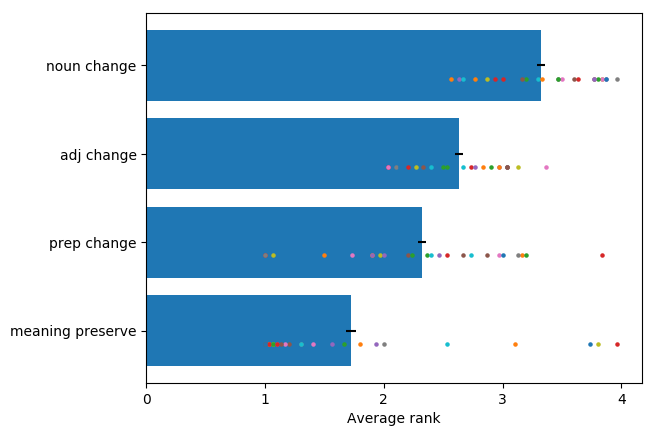

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

phrase = ('noun change','adj change','prep change', 'meaning preserve')
y_pos = np.arange(len(phrase))
ax.barh(y_pos, avg, xerr=errors, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(phrase)
ax.invert_yaxis()  
ax.set_xlabel('Average rank')
ax.set_xticks([0,1,2,3,4])

#add each individ to the plot
for k in individs:
    plt.scatter(k,[0.15,1.15,2.15,3.15],s=5,zorder=2)

plt.show()